# Predicting Default of Loan Using Random Forest Classifiers
-------  

Published: July 13, 2020 

Author: Anjani K Shiwakoti


## Project Overview
-------
Random Forest is a supervised learning algorithm. Random Forest is simply a collection of Decision Trees (with some exceptions). Random forest builds multiple decision trees and combines them together to give a more accurate and stable prediction of a data model. One of the big problems in machine learning is overfitting, but as long as there are enough trees in the forest, the random forest classifier can almost always avoid overfitting. It does so by generating additional randomness to each subset of the widening or deepening number of trees. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features. This results in a wide diversity that generally results in a better model. One major advantage of random forest is that it can be used for both classification and regression tasks that form the majority of current machine learning systems. The main limitation of Random Forest is that a large number of trees can make the algorithm rather slow and ineffective for real-time predictions.

**Objective**:  In this project, I will implement a variety of decision tree based classifiers to attempt prediction of whether or not a customer will pay back his/her loan. 

Steps:  
- Manipulating DataFrames  
- Visualizing data  
- Calculation of impurity measures  
- Using Scikit-Learn's tree and forest models  
- Evaluate the effects of hyperparameter tuning  


**Motivation**: A model is as good as the data it is fed into. Decision Trees and Forests offer easy to understand yet fairly advanced models with a variety of hyper-parameters to increase or decrease complexity to tune between bias and variance

**Problem**:  
Given a number of personal variables, (sex, education, marriage status, age); and recent payment history, attempt to predict whether or not a customer will default in the next month.   

**Data Source**: Loan_Exercise.xlsx (mock sample)


---

Data Set Information:


Attribute Information:

id: unique identifier

Loan_status: if the loaner paid back in full 'Fully Paid' or partially 'Charged Off'

Total_received_principal: the money the loaner paid back 

Others might be self explanatory		
		
---

<a id="part1"></a>
Acquire, Explore, and Pre-process Data
----  

#### Import / Read in Data

In [229]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [230]:
import os 
os.chdir ('/Users/AnjaniK/Desktop/LOAN_EXERCISE_FB/')

In [231]:
pwd()

'C:\\Users\\AnjaniK\\Desktop\\LOAN_EXERCISE_FB'

In [232]:
# Read in Data (P.S. I cleaned up the original dataset, then converted the given excel file to open document format (ODS))
df = pd.read_excel("Loan_Exercise.ods", engine="odf")
df.head()

,id,Loan Amount,Interest_Rate,Loan_Duration (days),Employment_Title,Annual_Income,Loan_Status,Total_received_principal,Total_received_late_fee,Loan Date
0,1,15000,0.0890,476,aircraft maintenance engineer,63000.0,Fully Paid,15000.0,0.0,2014-08-10
1,2,12000,0.0762,373,Systems Engineer,96500.0,Fully Paid,12000.0,0.0,2014-05-24
2,3,27050,0.1099,885,Team Leadern Customer Ops & Systems,55000.0,Fully Paid,27050.0,0.0,2014-11-04
3,4,12000,0.1099,392,Project Manager,60000.0,Fully Paid,12000.0,0.0,2014-07-07
4,5,4800,0.1099,157,Surgical Technician,39600.0,Fully Paid,4800.0,0.0,2014-03-04


### Explore the Data  
#### Check dimensions, null values, datatype inconsistencies, and outliers

In [233]:
print("Data Shape (Rows x Columns): " , df.shape, "\n")


Data Shape (Rows x Columns):  (198, 10) 



In [234]:
### explore the schema, data types for each feature and total memory usage 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        198 non-null    int64         
 1   Loan Amount               198 non-null    int64         
 2   Interest_Rate             198 non-null    float64       
 3   Loan_Duration (days)      198 non-null    int64         
 4   Employment_Title          192 non-null    object        
 5   Annual_Income             198 non-null    float64       
 6   Loan_Status               198 non-null    object        
 7   Total_received_principal  198 non-null    float64       
 8   Total_received_late_fee   198 non-null    float64       
 9   Loan Date                 198 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 15.6+ KB


In [235]:
### perform descriptive statistics on numerical columns
### we can see count, mean, standard deviation, Nth percentile, min and max values
df.describe()

,id,Loan Amount,Interest_Rate,Loan_Duration (days),Annual_Income,Total_received_principal,Total_received_late_fee
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,99.500000,14472.601010,0.146023,451.085859,79265.065657,13275.233283,0.642778
std,57.301832,8281.059664,0.041134,255.838638,48614.628808,8411.903966,3.867077
min,1.000000,1000.000000,0.060300,37.000000,21900.000000,0.000000,0.000000
25%,50.250000,9062.500000,0.119900,274.250000,50000.000000,7002.600000,0.000000
50%,99.500000,12000.000000,0.144700,393.500000,70000.000000,11744.405000,0.000000
75%,148.750000,19668.750000,0.169900,564.500000,94454.750000,17106.250000,0.000000
max,198.000000,35000.000000,0.258900,1406.000000,425000.000000,35000.000000,32.720000


In [236]:
### It appears there's some null values in one of the columns. 
### So imputation step may be necessary for Employment_Title column.
df.isna().sum()

id                          0
Loan Amount                 0
Interest_Rate               0
Loan_Duration (days)        0
Employment_Title            6
Annual_Income               0
Loan_Status                 0
Total_received_principal    0
Total_received_late_fee     0
Loan Date                   0
dtype: int64

In [237]:
df = df.fillna(df.mode().iloc[0])
df.head()

,id,Loan Amount,Interest_Rate,Loan_Duration (days),Employment_Title,Annual_Income,Loan_Status,Total_received_principal,Total_received_late_fee,Loan Date
0,1,15000,0.0890,476,aircraft maintenance engineer,63000.0,Fully Paid,15000.0,0.0,2014-08-10
1,2,12000,0.0762,373,Systems Engineer,96500.0,Fully Paid,12000.0,0.0,2014-05-24
2,3,27050,0.1099,885,Team Leadern Customer Ops & Systems,55000.0,Fully Paid,27050.0,0.0,2014-11-04
3,4,12000,0.1099,392,Project Manager,60000.0,Fully Paid,12000.0,0.0,2014-07-07
4,5,4800,0.1099,157,Surgical Technician,39600.0,Fully Paid,4800.0,0.0,2014-03-04


In [238]:
### After imputation with mode (most frequent value), there are no nulls
df.isna().sum()

id                          0
Loan Amount                 0
Interest_Rate               0
Loan_Duration (days)        0
Employment_Title            0
Annual_Income               0
Loan_Status                 0
Total_received_principal    0
Total_received_late_fee     0
Loan Date                   0
dtype: int64

    
### Investigate Categorical Variables  

The "`default payment next month`" will be the target used for classification. Investigate its distribution.

In [239]:
# explore if the classes are balanced/imbalanced

value_counts = df['Loan_Status'].value_counts()
print (value_counts)

print ("Fully Paid:", value_counts[0])  #173 records
print ("Charged Off:", value_counts[1])  #25 records

# classes are imbalanced
# SMOTE may be necessary

Fully Paid     173
Charged Off     25
Name: Loan_Status, dtype: int64
Fully Paid: 173
Charged Off: 25


This disparity in proportion of default and non-default records means we are dealing with unbalanced classes. In order to avoid bias, we need to balance the minority class (the class with fewer data points) by over-sampling (SMOTE: Synthetic Minority Oversampling Technique)


#### Investigating the Features:

In [240]:
df['Employment_Title'].nunique()

169

Note:We have given 169 different employment titles, and an additional 6 records having null values (from above)

In [241]:
df['Employment_Title'].value_counts()

Teacher                         15
Registered Nurse                 5
Project Manager                  4
Manager                          4
General Manager                  2
                                ..
Systems Analyst                  1
BRANCH MANAGER                   1
Lead Sr. Consultant              1
LTC                              1
Street Operations Supervisor     1
Name: Employment_Title, Length: 169, dtype: int64

In [242]:
df['Annual_Income'].value_counts()

60000.0     10
70000.0      7
80000.0      7
50000.0      7
65000.0      7
            ..
250000.0     1
59400.0      1
28160.5      1
105680.0     1
61000.0      1
Name: Annual_Income, Length: 107, dtype: int64

In [243]:
df['Loan Amount'].value_counts()

12000    18
10000    16
35000     9
20000     9
16000     8
         ..
7550      1
29175     1
10100     1
2200      1
19200     1
Name: Loan Amount, Length: 85, dtype: int64

In [244]:
df['Interest_Rate'].value_counts()

0.1398    17
0.1353    15
0.1624    14
0.1199    13
0.1498    13
0.1561    12
0.1099    11
0.0762    10
0.1447     9
0.1825     9
0.1285     8
0.0790     7
0.1922     7
0.2050     7
0.1757     7
0.0967     7
0.1699     6
0.0890     6
0.1997     5
0.2290     3
0.2148     3
0.2240     3
0.0662     1
0.2370     1
0.0603     1
0.2580     1
0.2589     1
0.2340     1
Name: Interest_Rate, dtype: int64

In [245]:
df['Loan_Duration (days)'].value_counts()

332    5
407    4
321    3
380    3
488    3
      ..
415    1
670    1
157    1
155    1
282    1
Name: Loan_Duration (days), Length: 160, dtype: int64

#### A Closer look at the "Total_received_principal" vs "Total_received_late_fee" variable

In [246]:
df['Total_received_principal'].value_counts()

12000.00    16
10000.00    15
35000.00     8
20000.00     8
16000.00     6
            ..
26400.00     1
15600.00     1
15875.00     1
28100.00     1
8903.98      1
Name: Total_received_principal, Length: 101, dtype: int64

In [247]:
df['Total_received_late_fee'].value_counts()

0.00     192
15.00      2
15.00      1
19.55      1
32.72      1
30.00      1
Name: Total_received_late_fee, dtype: int64

In [248]:
### drop unpromotable date type column (run once)
df.drop('Loan Date', axis='columns', inplace=True)


#### Investigate relationship between "Annual_Income", "Loan Amount"  predictor variables:

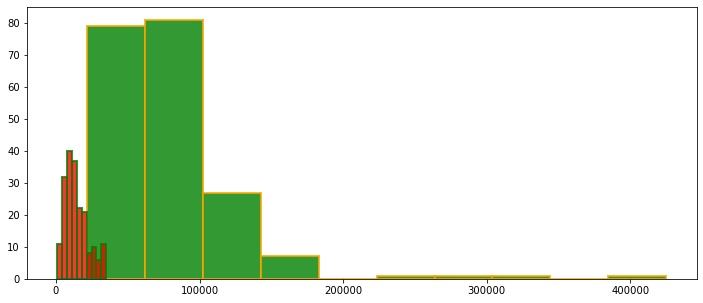

In [249]:
plt.figure(figsize=(12,5)) #change your figure size as per your desire here
n,bins,patch = plt.hist(df['Annual_Income'], bins=10, color='green', alpha=0.8, label='Value', edgecolor='orange', linewidth=2)
n,bins,patch = plt.hist(df['Loan Amount'], bins=10, color='red', alpha=0.8, label='Value', edgecolor='green', linewidth=2)


## Outlier Detection
#### BoxPlots are one of the best ways to visualize data and detect outliers

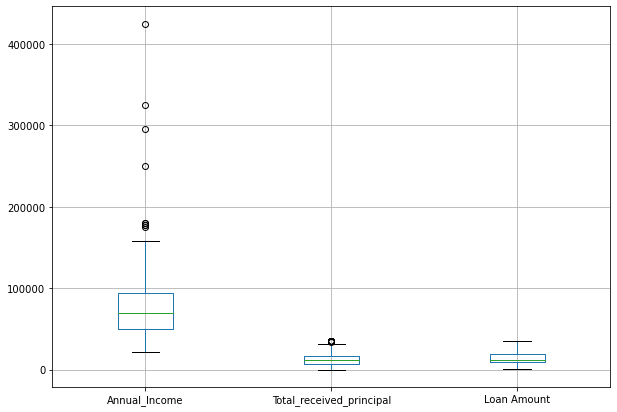

In [250]:
df[['Annual_Income','Total_received_principal','Loan Amount']].boxplot(figsize =(10, 7))

In [251]:
### removing outliers -- data lying outside of 3 standard deviations

df = df[np.abs(df['Annual_Income']-df['Annual_Income'].mean()) <= (3*df['Annual_Income'].std())]

In [252]:
df.head()

,id,Loan Amount,Interest_Rate,Loan_Duration (days),Employment_Title,Annual_Income,Loan_Status,Total_received_principal,Total_received_late_fee
0,1,15000,0.0890,476,aircraft maintenance engineer,63000.0,Fully Paid,15000.0,0.0
1,2,12000,0.0762,373,Systems Engineer,96500.0,Fully Paid,12000.0,0.0
2,3,27050,0.1099,885,Team Leadern Customer Ops & Systems,55000.0,Fully Paid,27050.0,0.0
3,4,12000,0.1099,392,Project Manager,60000.0,Fully Paid,12000.0,0.0
4,5,4800,0.1099,157,Surgical Technician,39600.0,Fully Paid,4800.0,0.0


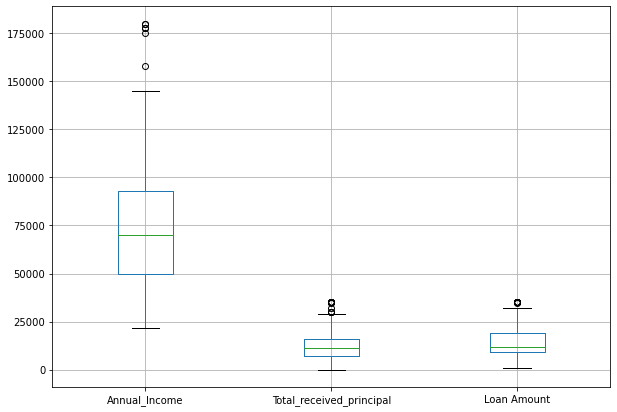

In [253]:
df[['Annual_Income','Total_received_principal','Loan Amount']].boxplot(figsize =(10, 7))

### Preprocessing
We have some categorical columns in our dataset.
`pd.get_dummies()` will allow us to create n-1 binary features to encode the n categories.  

#### Note regarding `get_dummies()`
`pd.get_dummies()` is **NOT** appropriate in many ML applications because it cannot deal with "new" categories possibly found in a test set. The function is used here for simplicities' sake.


In [254]:
df = pd.concat([
                df.drop('Loan_Status', axis = "columns"), 
                pd.get_dummies(df['Loan_Status'], 
                               prefix = None, drop_first = True)],
                axis = 'columns')


In [255]:
df['Fully Paid'].value_counts()

1    169
0     25
Name: Fully Paid, dtype: int64

In [256]:
df = pd.concat([
                df.drop('Employment_Title', axis = "columns"), 
                pd.get_dummies(df['Employment_Title'], 
                               prefix = None, drop_first = True)],
                axis = 'columns')

In [257]:
df.head()

,id,Loan Amount,Interest_Rate,Loan_Duration (days),Annual_Income,Total_received_principal,Total_received_late_fee,Fully Paid,AR2,Account Manager,...,mechanic,payroll/file clerk,production controller,public affairs,sales man,sales merchandiser,server,truck driver,ultrasound tech,vet tech
0,1,15000,0.0890,476,63000.0,15000.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,12000,0.0762,373,96500.0,12000.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,27050,0.1099,885,55000.0,27050.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,12000,0.1099,392,60000.0,12000.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,4800,0.1099,157,39600.0,4800.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<a id = "part2"></a>
## Trees and Forests:

Given a target (categorical or continuous), a decision tree iteratively splits data. It splits data at the value in whichever feature that creates the greatest separation among the target variable.


### Depth

The above tree has a depth of 2.  
The maximum depth to which a is allowed to grow can be specified with `max_depth` in `sklearn`. By default, `max_depth` it is set to `None` which means the tree will grow until all leaves (terminal nodes) are pure, or until other user-specified criteria are met. Importantly, `max_depth` can impact the amount of time it takes to build a tree (this becomes especially important when starting to work with forests.)  

### Splitting

The splits in the above trees were determined intuitively. In the `sklearn` package two splitting criterion are available for classifiers; "gini" and "entropy". In general, "gini" splitting favors larger partitions, where "entropy" favors splitting of smaller groups that are of a single class. 


### Gini and Entropy Calculations

The gini-index for a node is given by: $$1- \sum_{j=1}^n p^2_j$$  
Where there are n classes and $p_j$ is the frequency of class j in that node.  
Finally, the indexes for each of these nodes is weighted by the proportion of data at each node, then summed.  
Building the intuition, the gini-indicies that are closer to 0 are more "pure"!

### Forests

"Forests" are collections of decision trees designed to protect against over-fitting.  
A single decision tree (particularly one that is allowed to grow to any depth), may be prone to overfitting. Algorithmically, the tree is designed to continue to make splits until it has completely classified all of the available data, and/or exhausted every possible split. Thus, no complexity and no particular is too fine for the tree to split upon. A tree might be "pruned" by setting max_depth to protect against over fitting, but, a "forest" of trees might also be used instead.  

### Building Tree / Forest Models  

#### Baseline Accuracy:
As our main objective for building this model is to prediction of whether or not a customer will pay back his/her loan, a vey important question to ask is:
What percentage of observations would be correctly predicted if the majority class were predicted every time? What is the baseline accuracy?

In [258]:
baseline_accuracy = count_non_default/(count_default+count_non_default) * 100
print("Baseline Accuracy: ", baseline_accuracy)


Baseline Accuracy:  87.37373737373737


## Building our models with sklearn and comparing our results

#### Import models and metrics; create train-test split

In [259]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


# Instantiate tree and forest models
decisiontree = DecisionTreeClassifier()
bagging = BaggingClassifier()
randomforest = RandomForestClassifier()
extratree = ExtraTreesClassifier()

In [260]:
import numpy as np
from collections import Counter
from imblearn.over_sampling import SMOTE

# Create train-test splits (70/30 split)
X = df.drop('Fully Paid', axis = 'columns')
y = df['Fully Paid']

# summarize class distribution
counter = Counter(y)

print(counter)
# transform the dataset
oversample = SMOTE()

X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)


Counter({1: 169, 0: 25})
Counter({1: 169, 0: 169})


In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 1234)

## Model Selection

#### When building any machine learning model, we do not just select one model and rely on its result for our use case but rather we create several ensemble models and cross-validate their outputs and evaluate model performance using various metrics to get the optimal result. 

#### Model training and evaluating performance of an emsemble of classifiers using default parameters:

In [262]:
decisiontree.fit(X_train, y_train)
print("Decision Trees: \n", classification_report(y_test, decisiontree.predict(X_test)), "\n")


print("-" * 60)

bagging.fit(X_train, y_train)
print("Bagging: \n", classification_report(y_test, bagging.predict(X_test)), "\n")


print("-" * 60)

randomforest.fit(X_train, y_train)
print("Random Forest: \n", classification_report(y_test, randomforest.predict(X_test)), "\n")


print("-" * 60)

extratree.fit(X_train, y_train)
print("Extra Trees: \n", classification_report(y_test, extratree.predict(X_test)), "\n")



Decision Trees: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        50
           1       0.96      0.92      0.94        52

    accuracy                           0.94       102
   macro avg       0.94      0.94      0.94       102
weighted avg       0.94      0.94      0.94       102
 

------------------------------------------------------------
Bagging: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        50
           1       0.94      0.94      0.94        52

    accuracy                           0.94       102
   macro avg       0.94      0.94      0.94       102
weighted avg       0.94      0.94      0.94       102
 

------------------------------------------------------------
Random Forest: 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        50
           1       0.93      0.96      0.94        52

    accura

#### Values of different predictions

Are all predictions in this data set equal in business value? In other words, is correctly predicting a "default" as valuable as predicting a "non-default"?
No. They are of unequal business values. From a business perspective, being able to correctly predict the negative class (defaulters on loans) is more valuable, as it helps mitigate risks.

<a id = "part3"></a>

## Hyper Parameter Tuning

It appears both the Random Forest and the Extra Trees perform in a similarly effective manner. For this section, we will try to increase the performance of the Random Forest by tuning a couple hyper parameters, namely `criterion` and `estimators`

Because we are more interested in forecasting defaults than non-defaults, we will optimize on the recall of defaults -- recall is the proportion of defaults predicted over total defaults.  


In [263]:
 %%time
 from sklearn.metrics import recall_score
 criterion = ['gini', 'entropy']
 n_estimators = [5,10,20, 50, 100]
 scores = dict()
 i = 0
 for c in criterion:
     for e in n_estimators:
         rf = RandomForestClassifier(n_estimators = e, criterion = c, random_state = 1738)
         rf.fit(X_train, y_train)
         scores[i] = {'recall':recall_score(y_test, rf.predict(X_test)), 'trees' :e, "crit":c}
         i+=1

Wall time: 934 ms


In [264]:
pd.DataFrame(scores).T

,recall,trees,crit
0,0.961538,5,gini
1,0.942308,10,gini
2,1,20,gini
3,0.980769,50,gini
4,0.980769,100,gini
5,0.884615,5,entropy
6,0.923077,10,entropy
7,0.923077,20,entropy
8,0.961538,50,entropy
9,0.980769,100,entropy


## Conclusion

According to the output shown above, the model with the best recall score featured: 
How many trees? 50 trees.
Which splitting method? Both Gini and Entropy yielded similar results. 


With a general sense that maybe a `RandomForestClassifier` will perform best using either `gini` or `entropy` splitting with somewhere around 50 trees, further hyper-parameter tuning below.

On drilling down and focusing on 'gini' random forests roughly 50 trees it becomes clearer that
increasing the number of trees is yeilding the amount the recall jumps around it is difficult to tell as there is not enough consistency in the results to say more trees are "better" or "worse".
Again, more 'good quality' data is needed to better overall accuracy, reliability and quality of model prediction.

While it might be tempting to try to tune-and-tune-and-tune hyper-parameters to increase scores, in many cases (as in the example above) hyper-parameter tuning mostly results in ***not** creating a better model*, but a model that does a better job of predicting the test set.  

Author: Anjani Kumar Shiwakoti
Date Published: July 13, 2020

## The End